# 2D Ising Model
Running the Monte Carlo steps using Metropolis algorithm

1. #### Import required package

In [4]:
from __future__ import division
import mc_utils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

2. #### Initialisation


In [5]:
# Initialisation

## change these parameters for a smaller (faster) simulation 
nt      = 88         #  number of temperature points
N       = 50         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)

# divide by number of samples, and by system size to get intensive values

3. #### Implementing the method


In [6]:
for tt in tqdm(range(nt)):
    E1 = M1 = E2 = M2 = 0
    config = mc_utils.initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):                  # equilibrate
        mc_utils.mcmove(config, iT, N)           # Monte Carlo moves

    for i in range(mcSteps):
        mc_utils.mcmove(config, iT, N)           
        Ene = mc_utils.calcEnergy(config, N)     # calculate the energy
        Mag = mc_utils.calcMag(config, N)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

100%|██████████| 88/88 [00:46<00:00,  1.91it/s]


4. #### Display the analysis of the states


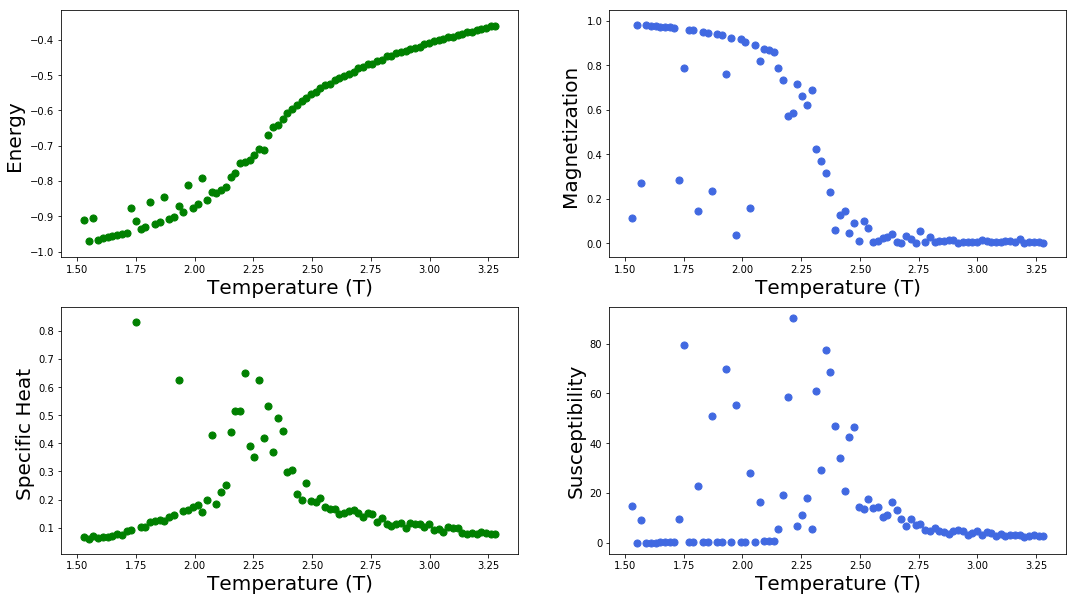

In [7]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='Green')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='Green')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

5. #### Perform the simulation

- Import required package

In [1]:
from __future__ import division
import ising_utils

- Initialisation

In [2]:
rm = ising_utils.Ising()

- Display the simulation


100%|██████████| 1001/1001 [00:01<00:00, 719.88it/s]


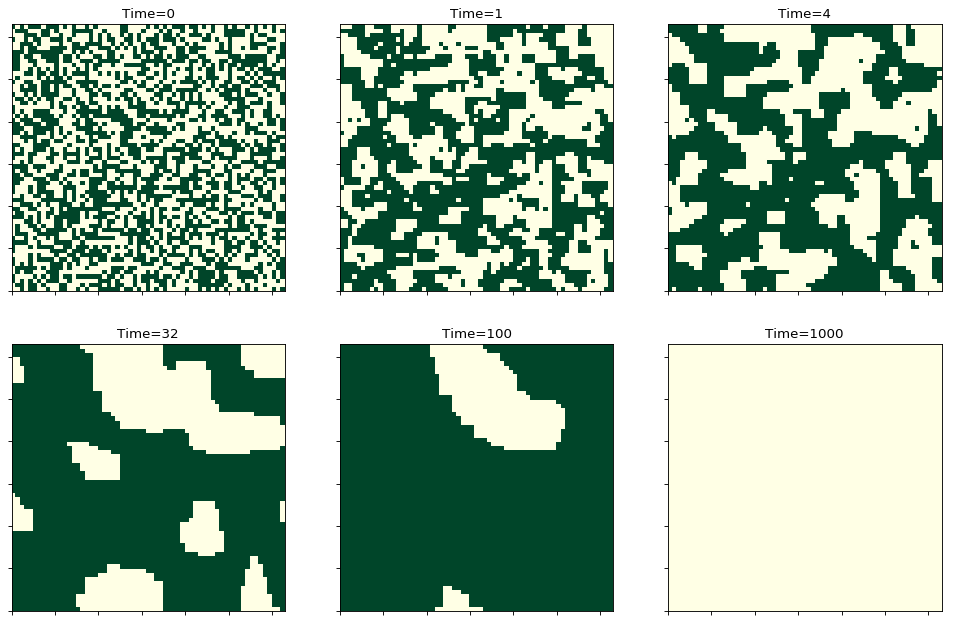

In [3]:
rm.simulate()